In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("house-prices.csv")
print(df.head())

X = df[['area']].values  
y = df['price'].values  

   area      price
0  1567  177067.50
1  3345  511748.20
2  3722  404096.67
3  2783  357916.31
4  2949  362409.54


In [4]:
# Manual Linear Regression with Gradient Descent

X_norm = (X - np.mean(X)) / np.std(X)
y_norm = (y - np.mean(y)) / np.std(y)

m = len(y)  
X_b = np.c_[np.ones((m, 1)), X_norm] 

theta = np.zeros(2)   
alpha = 0.01        
epochs = 1000
costs = []

for _ in range(epochs):
    predictions = X_b.dot(theta)
    error = predictions - y_norm
    cost = (1/(2*m)) * np.sum(error**2)
    costs.append(cost)
    gradient = (1/m) * X_b.T.dot(error)
    theta -= alpha * gradient

print("Manual Model Parameters (Normalized):", theta)


slope = theta[1] * (np.std(y)/np.std(X))
intercept = np.mean(y) - slope*np.mean(X)
print("Manual Linear Regression -> Price = {:.2f} + {:.2f}*Area".format(intercept, slope))

Manual Model Parameters (Normalized): [-5.56532598e-17  7.66886287e-01]
Manual Linear Regression -> Price = 60966.17 + 96.59*Area


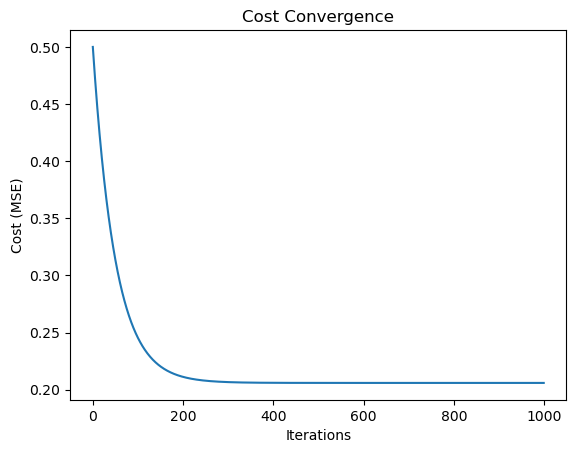

In [5]:
# Plot cost convergence
plt.plot(range(epochs), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Convergence")
plt.show()

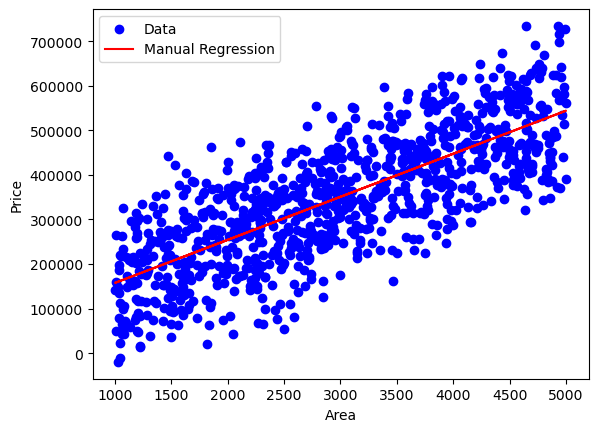

In [6]:
# Plot regression line
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, intercept + slope*X, color="red", label="Manual Regression")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()

In [8]:
# Compare with sklearn
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Sklearn Model -> Price = {:.2f} + {:.2f}*Area".format(lin_reg.intercept_, lin_reg.coef_[0]))

Sklearn Model -> Price = 60953.78 + 96.60*Area


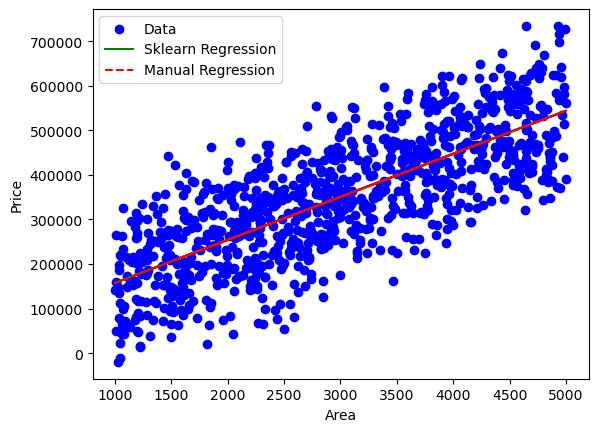

In [9]:
# Compare visually
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, lin_reg.predict(X), color="green", label="Sklearn Regression")
plt.plot(X, intercept + slope*X, color="red", linestyle="--", label="Manual Regression")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()

In [12]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Manual Gradient Descent", "Scikit-learn"],
    "Intercept": [intercept, lin_reg.intercept_],
    "Slope (Area)": [slope, lin_reg.coef_[0]]
})

print(results)


                     Model     Intercept  Slope (Area)
0  Manual Gradient Descent  60966.174366      96.59387
1             Scikit-learn  60953.776523      96.59804
